In [ ]:
%pip install tensorflow

In [1]:
#Cargo el dataset
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data(label_mode="fine")

In [3]:
#Viendo el tamaño de la data
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


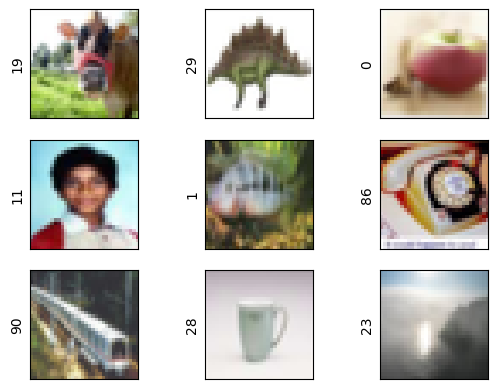

In [4]:
#Realizo el plotteo de algunas imágenes
import matplotlib.pyplot as plt
for imagen in range(9):
    plt.subplot(3,3,imagen+1)
    plt.xticks([]),plt.yticks([])
    plt.ylabel(y_train[imagen].item())
    plt.imshow(x_train[imagen])

In [5]:
#Reescalo los píxeles de las imágenes
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [6]:
#Ahora, divido la data de x_train en training y val, para ver el performance de la red
x_val,x_training=x_train[0:10000],x_train[10000:]
y_val,y_training=y_train[0:10000],y_train[10000:]

In [7]:
print(x_val.shape,y_val.shape)
print(x_training.shape,y_training.shape)

(10000, 32, 32, 3) (10000, 1)
(40000, 32, 32, 3) (40000, 1)


In [8]:
#Data augmentation
from tensorflow import keras
from tensorflow.keras import layers, regularizers
data_augmentation=keras.Sequential(
    [layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.2)]
)

In [15]:
#Ahora, creo la arquitectura de la red neuronal
input=keras.Input((32,32,3))
x=data_augmentation(input)
x=layers.Conv2D(filters=30,kernel_size=3,padding="same",activation="relu")(input)
x=layers.Conv2D(filters=60,kernel_size=3,padding="same",activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Dropout(0.2)(x)

x=layers.Conv2D(filters=100,kernel_size=3,padding="same",activation="relu")(x)
x=layers.Conv2D(filters=150,kernel_size=3,padding="same",activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Dropout(0.4)(x)

x=layers.Conv2D(filters=200,kernel_size=3,activation="relu")(x)
x=layers.MaxPool2D(pool_size=2)(x)

x=layers.Flatten()(x)
x=layers.Dense(5000,activation="relu")(x)
x=layers.Dropout(0.5)(x)

output=layers.Dense(100,activation="softmax")(x)
modelo=keras.Model(input,output)

In [16]:
modelo.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 30)          │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 60)          │          16,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 100)         │          54,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 150)         │         135,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 150)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 150)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 200)           │         270,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 200)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5000)                │       9,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 5000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         500,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,981,650 (38.08 MB)

 Trainable params: 9,981,650 (38.08 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#Realizo la etapa de compile para el modelo, donde ajusto algunos hiperparámetros como el optimizador
modelo.compile(
    #optimizer=optimizador,
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy", #pues los labels son números enteros, no vectores OH
    metrics=["accuracy"]
)

In [18]:
#Early stopping para parar el modelo luego de que no mejora el performance
from tensorflow.keras import callbacks
ES=callbacks.EarlyStopping(
    monitor="val_loss", #Métrica a monitorear
    patience=15, #Luego de 15 épocas que no hay mejora en la métrica val_loss, se para el training,
    restore_best_weights=True #Se restauran los pesos de la época con el mejor valor de la métrica monitoreada
)

In [19]:
#Entreno al modelo
history=modelo.fit(
    x_training,y_training,
    epochs=80,
    batch_size=30,
    validation_data=(x_val,y_val),
    callbacks=ES
)

Epoch 1/80
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.0433 - loss: 4.2976 - val_accuracy: 0.1466 - val_loss: 3.5678
Epoch 2/80
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1899 - loss: 3.3752 - val_accuracy: 0.2637 - val_loss: 3.0027
Epoch 3/80
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2829 - loss: 2.8943 - val_accuracy: 0.2933 - val_loss: 2.8292
Epoch 4/80
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3429 - loss: 2.5938 - val_accuracy: 0.3280 - val_loss: 2.7588
Epoch 5/80
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.3926 - loss: 2.3819 - val_accuracy: 0.3240 - val_loss: 2.7915
Epoch 6/80
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4168 - loss: 2.2639 - val_accuracy: 0.3972 - val_loss: 2.4000
Epoch 7/80
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4477 - loss: 2.1503 - val_accuracy: 0.3626 - val_loss: 2.5777
Epoch 8/80
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4683 - loss: 

In [41]:
#El entrenamiento paró, debido al calbackboard EarlyStopping, pues no hubo mejora luego de 15 épocas en "val_loss".
#Sin embargo, verifico el accuracy viendo las métricas
from sklearn import metrics
#Predicción del modelo
pred=modelo.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
import numpy as np
clases_pred=np.argmax(pred,axis=1)

In [43]:
clases_correctas=y_test.reshape(y_test.shape[0],)

In [48]:
#Accuracy score en test
accuracy=metrics.accuracy_score(clases_correctas,clases_pred)
print(f"El accuracy en test es {accuracy}")

El accuracy en test es 0.4008


In [49]:
#Precision score en test: Cuántos, del total que el modelo dijo que eran positivos, lo fueron verdaderamente.
#--> De todas las veces que el modelo dijo que una instancia pertenecía a una clase positiva, ¿cuántas veces estaba en lo cierto?
precision=metrics.precision_score(clases_correctas,clases_pred,average="macro")
print(f"Precision en test: {precision}")

Precision en test: 0.4350755907156042


In [ ]:
#Recall score en test: Del total de positivos reales, cuántos el modelo dijo que eran positivos

In [50]:
recall=metrics.recall_score(clases_correctas,clases_pred,average="macro")
print(f"Recall en test: {recall}")

Recall en test: 0.40079999999999993


In [51]:
#Evaluando el modelo en test
test_loss,test_acc=modelo.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4048 - loss: 2.3610


In [52]:
print(f"Test loss: {test_loss} y Test accuracy: {test_acc}")

Test loss: 2.3650717735290527 y Test accuracy: 0.4007999897003174
